In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
start = '2010-01-01'
end = '2021-12-31'
stock = "AAPL"
data = yf.download(stock,start,end)
data.reset_index(inplace = True) #assigning index as 0,1 instead of dates



[*********************100%***********************]  1 of 1 completed


In [ ]:
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440329,6.455074,6.391276,6.422874,493729600
1,2010-01-05,6.451465,6.487878,6.417459,6.458086,601904800
2,2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
3,2010-01-07,6.337108,6.379841,6.291065,6.372318,477131200
4,2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800
...,...,...,...,...,...,...
3015,2021-12-23,173.248428,173.808633,172.255803,172.825830,68356600
3016,2021-12-27,177.228821,177.317269,174.024889,174.044535,74919600
3017,2021-12-28,176.206665,178.211591,175.459740,177.061713,79144300


moving average data helps investors see how the stock has performed over 20 weeks and to find the price trend if it is upward or downward , such that we are generating it for training of model

In [ ]:
ma_100_days = data.Close.rolling(100).mean() #moving average for 100 days


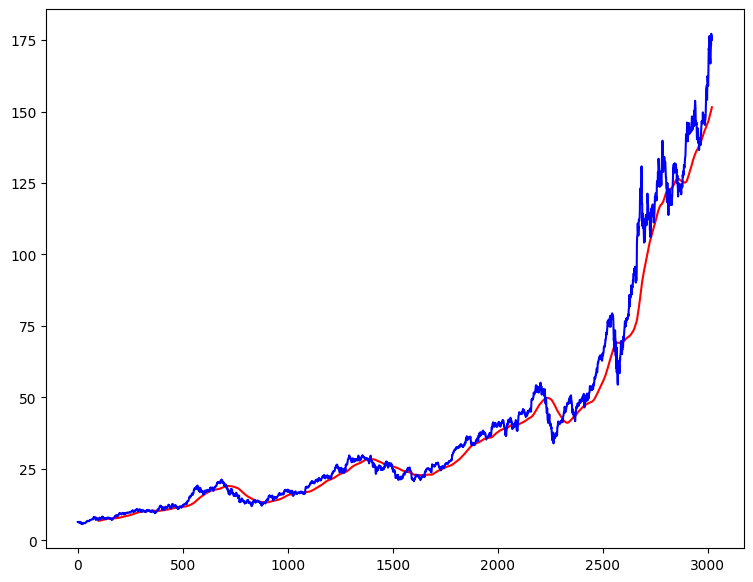

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(ma_100_days,"r")
plt.plot(data.Close,"b")
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()


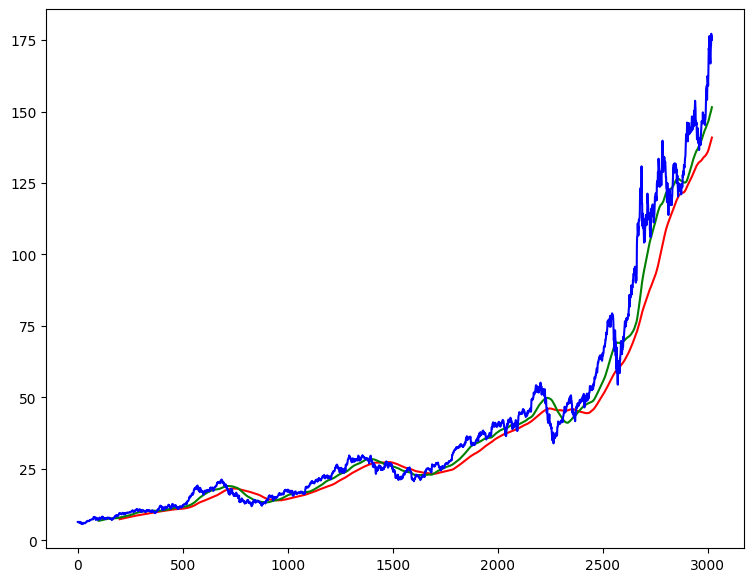

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(ma_200_days,"r")
plt.plot(ma_100_days,"g")
plt.plot(data.Close,"b")
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)]) #80% of data is used for training
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])#20% of data used for testing


In [ ]:
data_train.shape[0] #this data is used for training


2416

In [ ]:
data_test.shape[0]#this data for testing


604

now we have splited data into training and testing data set

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


we are using this MinMaxScaler which is used to fit our data in 0,1

In [ ]:
data_train_scale = scaler.fit_transform(data_train)


we are slicing array to take 100 day's data to train and predict upon on 101's day

In [ ]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

x_train,y_train = np.array(x),np.array(y)

In [ ]:
x,y = np.array(x),np.array(y)

In [ ]:
x_train.shape


(2316, 100, 1)

Now we are building a model and train this through above data
we are import keras layers,
and now all layers will be in sequential way , so that output of one layer is used as input of other's layer


In [ ]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
#Sequential used to predict data upon time series

In [ ]:
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=120, activation='relu', return_sequences=True))  # Increased units
model.add(Dropout(0.3))
model.add(LSTM(units=150, activation='relu', return_sequences=True))  # Increased units
model.add(Dropout(0.4))
model.add(LSTM(units=180, activation='relu'))  # Increased units
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 585ms/step - loss: 0.2064
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 720ms/step - loss: 0.0660
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 824ms/step - loss: 0.0260
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 638ms/step - loss: 0.0128
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - loss: 0.0095
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 693ms/step - loss: 0.0093
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 633ms/step - loss: 0.0088
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 578ms/step - loss: 0.0085
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 689ms/step - loss: 0.0107
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 634ms/step - loss: 0.0084
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 567ms/step - loss: 0.0087
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 688ms/step - loss: 0.0084
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 648ms/step - loss: 0.0104
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 696ms/step - loss: 0.0085
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 120)            │         106,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 150)            │         162,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 180)                 │         238,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             181 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,643,945 (6.27 MB)

 Trainable params: 547,981 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,095,964 (4.18 MB)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)

In [ ]:
y_predict = model.predict(x)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step


In [ ]:
scale = 1/scaler.scale_


In [ ]:
y_predict = y_predict*scale

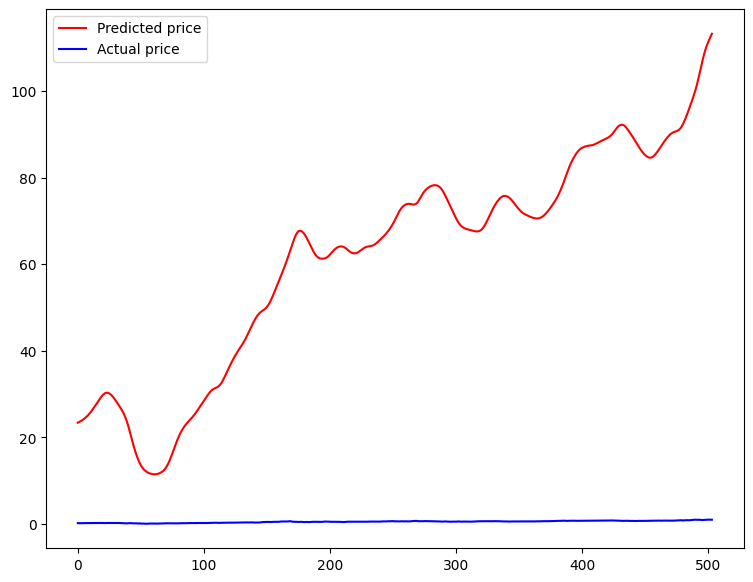

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(y_predict.flatten(), "r", label = "Predicted price")  # Flatten y_predict
plt.plot(y, "b", label = "Actual price")
plt.legend()
plt.show()

In [ ]:
model.save("stock_model.h5")